# Polynomial regression

In [1]:
#python >= 3.5 is required
import sys
assert sys.version_info >= (3,5)

#scikit-learn >= 1 is required
from sklearn import __version__ as skversion
assert skversion >= "1"

In [2]:
skversion

'1.0.1'

In [3]:
from sklearn.base import BaseEstimator,RegressorMixin

In [4]:
import numpy as np

In [5]:
X = 5 *  np.random.rand(100,1) - 3
y = 0.5* X**2 + X + 2 + np.random.randn(100,1)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style='darkgrid')

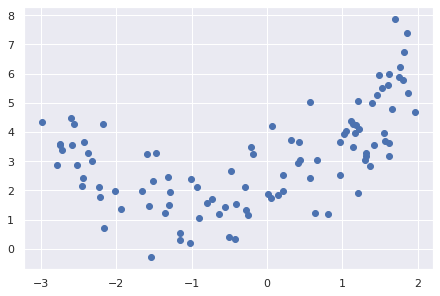

In [7]:
fig,axes = plt.subplots(1,layout='constrained')
axes.scatter(X,y)
plt.show()

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
ply_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly = ply_features.fit_transform(X)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
class GDRegressor(BaseEstimator, RegressorMixin):
    
    def __init__(self,alpha=0.1,n_iter=10000):
        self.alpha = alpha
        self.n_iter = n_iter
    
    def fit(self,X,y):
        X=np.hstack((np.ones((len(X),1)),X)) #adding intercept term to each training example (m,n+1)
        y=y.reshape(len(y),1) #reshaping to column vector
        m=len(y)
        theta = np.random.rand(X.shape[1] ,1) # (n+1,1)
        
        for i in range(0,self.n_iter):
            gradient = X.T.dot(X.dot(theta) - y)/m # Gradient
            theta = theta - self.alpha * gradient #see cs229 notes
        self.coef = theta
        return self
    
    def predict(self, X=None):
        X=np.hstack((np.ones((len(X),1)),X))
        return X.dot(self.coef)


In [12]:
lin_reg = GDRegressor(n_iter=1000)
lin_reg.fit(X_poly,y)

GDRegressor(n_iter=1000)

In [13]:
y_pred = lin_reg.predict(X_poly)

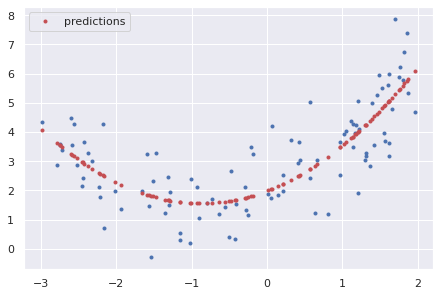

In [14]:
fig,axes = plt.subplots(1,layout='constrained')
axes.plot(X,y,'b.')
axes.plot(X,y_pred, 'r.',label='predictions')
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
mean_squared_error(y,y_pred)

0.9944225526067128

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
def plot_learning_curves(model,X,y):
    X_train, X_val,y_train,y_val = train_test_split(X,y,test_size=0.2)
    train_errors, val_errors = [],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_val_pred = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_pred,y_train[:m]))
        val_errors.append(mean_squared_error(y_val_pred,y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="training set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="validation set")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.legend()

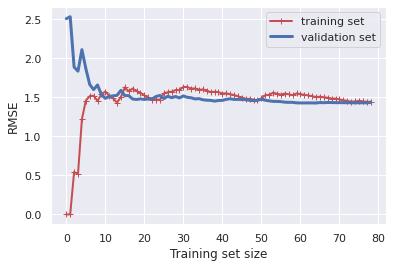

In [19]:
plot_learning_curves(lin_reg,X,y) 

## Comparison with scikit-learn least squares

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [21]:
poly_reg = Pipeline((
    ("poly_features", PolynomialFeatures(degree=2,include_bias=False)),
    ("scale", StandardScaler()),
    ("sgd_reg", LinearRegression())
    ))

In [22]:
poly_reg.fit(X,y)
pred = poly_reg.predict(y)
mean_squared_error(y,pred)

125.948581925097

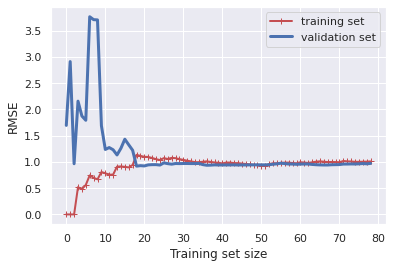

In [23]:
plot_learning_curves(poly_reg,X,y)